#### Imports

In [1]:
import gym
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from IPython.display import HTML
from collections import deque
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.losses import MSE

#### Environment setup

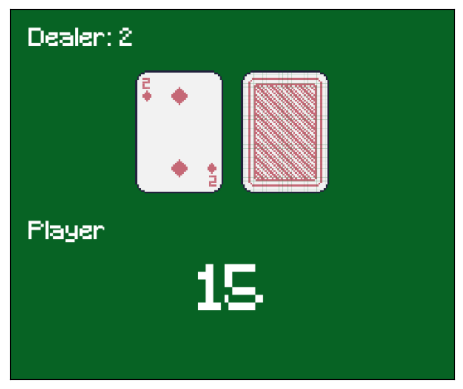

In [23]:
env = gym.make('Blackjack-v1', natural=False, sab=False, render_mode = 'rgb_array')
plt.xticks([])
plt.yticks([])
obs, info = env.reset(seed=42)
img = env.render() #creates an image
plt.imshow(img)

The observation consists of a 3-tuple containing: the player’s current sum, the value of the dealer’s one showing card (1-10 where 1 is ace), and whether the player holds a usable ace (0 or 1).

In [25]:
print(obs)

(15, 2, False)


There are two actions: stick (0), and hit (1).

In [4]:
env.action_space

Discrete(2)

In [5]:
action = 1

Hit - draw one more card

In [26]:
obs, reward, done, truncated, info = env.step(1)

In [27]:
print(obs)
print(reward)
print(done)
print(truncated)
print(info)

(25, 2, False)
-1.0
True
False
{}


#### VERY Basic policy

"Same" as dealer - hit until reach 17

In [55]:
def basic_policy(obs):
    current_sum = obs[0]
    if current_sum < 17:
        return 1
    else:
        return 0

In [58]:
def winning_percentages(wins, episodes):
    return (wins / episodes) * 100

In [66]:
losses = 0
wins = 0
number_of_episodes = 10000
for episode in range(number_of_episodes):
    episode_rewards = 0
    obs, info = env.reset(seed=episode) #different seeds everytime
    for step in range(200):
        action = basic_policy(obs)
        obs, reward, done, truncated, info = env.step(action)
        episode_rewards += reward
        if done or truncated:
            break
    if episode_rewards > 0:
        wins = wins + 1
    else:
        losses = losses + 1

In [67]:
print(f'Wins: {wins} | Losses: {losses} | Win Percentage: {winning_percentages(wins, number_of_episodes)}')

Wins: 4080 | Losses: 5920 | Win Percentage: 40.8


This shows, that a very basic policy of just hitting until you reach at least 17 will net you a win approximately 40% of the time.